<a href="https://colab.research.google.com/github/MasterCoderArnav/google_colab_face_reco/blob/main/Face_Recognition_using_face_recognition_lib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install face_recognition

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 100.1 MB 1.2 MB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566185 sha256=2ffdc3d47ac03bf028e3423c28a3027e12c8988637638701edcf430a0d386eb1
  Stored in directory: /root/.cache/pip/wheels/b4/4b/8f/751e99d45f089bdf366a7d3e5066db3c2b84a62e4377f534d7
Successfully built face-recognition-models


In [2]:
!mkdir known
!wget https://www.biography.com/.image/t_share/MTY2MzU3Nzk2OTM2MjMwNTkx/elon_musk_royal_society.jpg -O known/elon.jpg
!wget https://pbs.twimg.com/profile_images/988775660163252226/XpgonN0X_400x400.jpg -O known/bill.jpg
!wget https://www.biography.com/.image/t_share/MTE4MDAzNDEwNzg5ODI4MTEw/barack-obama-12782369-1-402.jpg -O known/obama.jpg

--2022-12-04 10:58:25--  https://www.biography.com/.image/t_share/MTY2MzU3Nzk2OTM2MjMwNTkx/elon_musk_royal_society.jpg
Resolving www.biography.com (www.biography.com)... 151.101.194.98, 151.101.130.98, 151.101.2.98, ...
Connecting to www.biography.com (www.biography.com)|151.101.194.98|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 151791 (148K) [image/jpeg]
Saving to: ‘known/elon.jpg’

known/elon.jpg      100%[===================>] 148.23K  --.-KB/s    in 0.002s  

2022-12-04 10:58:25 (59.6 MB/s) - ‘known/elon.jpg’ saved [151791/151791]

--2022-12-04 10:58:25--  https://pbs.twimg.com/profile_images/988775660163252226/XpgonN0X_400x400.jpg
Resolving pbs.twimg.com (pbs.twimg.com)... 192.229.237.101, 2606:2800:248:1707:10d3:19d0:1ba2:1a23
Connecting to pbs.twimg.com (pbs.twimg.com)|192.229.237.101|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2022-12-04 10:58:25 ERROR 404: Not Found.

--2022-12-04 10:58:25--  https://www.biography.com/

In [3]:
!mkdir unknown
!wget https://i.insider.com/5ddfa893fd9db26b8a4a2df7 -O unknown/1.jpg
!wget https://cdn-images-1.medium.com/max/1200/1*aEoYLgy4z1lT1kW7dqWzBg.jpeg -O unknown/2.jpg
!wget https://media2.s-nbcnews.com/j/newscms/2017_46/2224911/171113-bill-gates-se-247p_043bd413c63b2a97abf11bfad747538d.fit-760w.jpg -O unknown/3.jpg
!wget https://specials-images.forbesimg.com/imageserve/1184274010/960x0.jpg -O unknown/4.jpg

--2022-12-04 10:58:33--  https://i.insider.com/5ddfa893fd9db26b8a4a2df7
Resolving i.insider.com (i.insider.com)... 151.101.2.217, 151.101.66.217, 151.101.130.217, ...
Connecting to i.insider.com (i.insider.com)|151.101.2.217|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2324104 (2.2M) [image/png]
Saving to: ‘unknown/1.jpg’

unknown/1.jpg       100%[===================>]   2.22M  --.-KB/s    in 0.008s  

2022-12-04 10:58:33 (275 MB/s) - ‘unknown/1.jpg’ saved [2324104/2324104]

--2022-12-04 10:58:33--  https://cdn-images-1.medium.com/max/1200/1*aEoYLgy4z1lT1kW7dqWzBg.jpeg
Resolving cdn-images-1.medium.com (cdn-images-1.medium.com)... 162.159.153.4, 162.159.152.4, 2606:4700:7::a29f:9904, ...
Connecting to cdn-images-1.medium.com (cdn-images-1.medium.com)|162.159.153.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 119795 (117K) [image/jpeg]
Saving to: ‘unknown/2.jpg’

unknown/2.jpg       100%[===================>] 116.99K  --.-KB/s   

Processing 2.jpg
Processing 4.jpg


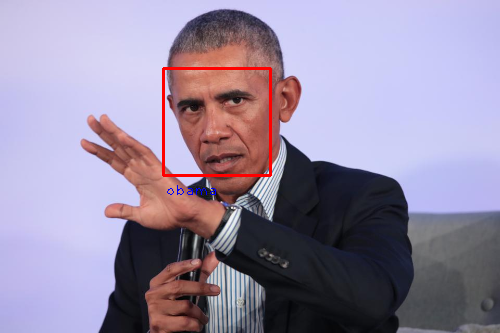

Processing borisandtrump.jpg


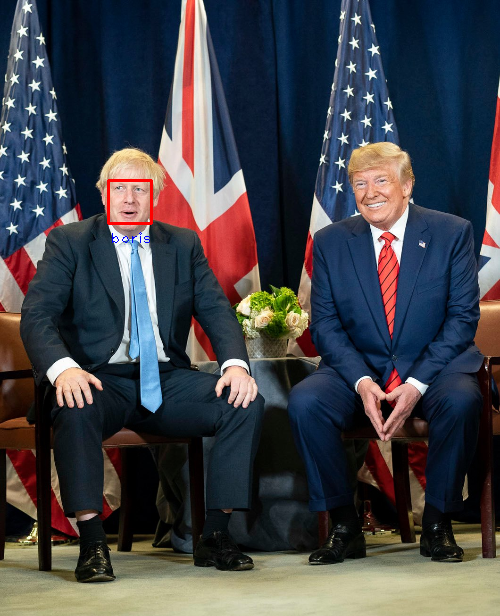

Processing 1.jpg


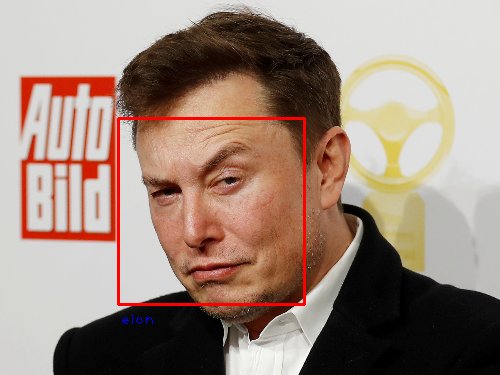

Processing borisandputin.jfif


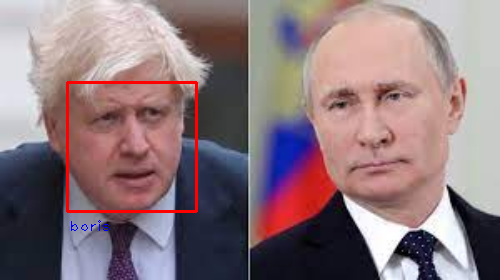

Processing 3.jpg


In [19]:
import face_recognition
import cv2
import os
from google.colab.patches import cv2_imshow

def read_img(path):
    img = cv2.imread(path)
    (h, w) = img.shape[:2]
    width = 500
    ratio = width / float(w)
    height = int(h * ratio)
    return cv2.resize(img, (width, height))


known_encodings = []
known_names = []
known_dir = 'known'

# for file in os.listdir(known_dir):
#     img = read_img(known_dir + '/' + file)
#     img_enc = face_recognition.face_encodings(img)[0]
#     known_encodings.append(img_enc)
#     known_names.append(file.split('.')[0])

for file in os.listdir(known_dir):
  if(file.split('.')[1]=='jpg' or file.split('.')[1]=='jfif'):
    img = read_img(known_dir + '/' + file)
    img_enc = face_recognition.face_encodings(img)[0]
    known_encodings.append(img_enc)
    known_names.append(file.split('.')[0])

unknown_dir = 'unknown'
for file in os.listdir(unknown_dir):
    if(file.split('.')[1]=='jpg' or file.split('.')[1]=='jfif'):
      print("Processing", file)
      img = read_img(unknown_dir + '/' + file)
      img_enc = face_recognition.face_encodings(img)[0]

      results = face_recognition.compare_faces(known_encodings, img_enc)
      # print(face_recognition.face_distance(known_encodings, img_enc))

      for i in range(len(results)):
          if results[i]:
              name = known_names[i]
              (top, right, bottom, left) = face_recognition.face_locations(img)[0]
              cv2.rectangle(img, (left, top), (right, bottom), (0, 0, 255), 2)
              cv2.putText(img, name, (left+2, bottom+20), cv2.FONT_HERSHEY_PLAIN, 1, (255, 0, 0), 1)
              cv2_imshow(img)
            

    # print(results)

